In [1]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load data
Carseats = pd.read_csv(r'C:\Users\Asus\Documents\MachineLearning2\Carseats.csv')
print(Carseats)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0          

In [3]:
train, test = train_test_split(Carseats, test_size=0.5, random_state=1)

In [4]:
train ####note that sale is 1st column so we don't want to use it as a predictor in our Tree model

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
365,6.53,154,30,0,122,162,Medium,57,17,No,No
99,4.88,121,47,3,220,107,Bad,56,16,No,Yes
348,12.57,132,102,20,459,107,Good,49,11,Yes,Yes
329,11.27,100,54,9,433,89,Good,45,12,Yes,Yes
320,5.86,136,70,12,171,152,Medium,44,18,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
255,7.71,123,81,8,198,81,Bad,80,15,Yes,Yes
72,5.52,115,45,0,432,116,Medium,25,15,Yes,No
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
235,5.53,126,32,8,95,132,Medium,50,17,Yes,Yes


In [5]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [6]:
train

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
365,6.53,154,30,0,122,162,57,17,0,0,1,1,0,1,0
99,4.88,121,47,3,220,107,56,16,1,0,0,1,0,0,1
348,12.57,132,102,20,459,107,49,11,0,1,0,0,1,0,1
329,11.27,100,54,9,433,89,45,12,0,1,0,0,1,0,1
320,5.86,136,70,12,171,152,44,18,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,7.71,123,81,8,198,81,80,15,1,0,0,0,1,0,1
72,5.52,115,45,0,432,116,25,15,0,0,1,0,1,1,0
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
235,5.53,126,32,8,95,132,50,17,0,0,1,0,1,0,1


In [7]:
tree_carseats = DecisionTreeRegressor(max_depth=None, random_state=1)
tree_carseats.fit(train.iloc[:, 1:], train["Sales"])
###x, y 

DecisionTreeRegressor(random_state=1)

In [8]:
pred_carseats = tree_carseats.predict(test.iloc[:, 1:])
mse_tree = mean_squared_error(test["Sales"], pred_carseats)
print("MSE of decision tree: ", mse_tree)

MSE of decision tree:  5.5891805


In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {"max_depth": range(2, 19)}
tree_cv = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=10)
tree_cv.fit(train.iloc[:, 1:], train["Sales"])
pruned_carseats = tree_cv.best_estimator_
pred_pruned = pruned_carseats.predict(test.iloc[:, 1:])
mse_pruned = mean_squared_error(test["Sales"], pred_pruned)
print("MSE of pruned decision tree: ", mse_pruned)

MSE of pruned decision tree:  5.047142393047004


In [23]:
pruned_carseats

DecisionTreeRegressor(max_depth=3, random_state=1)

In [10]:
rf_carseats = RandomForestRegressor(n_estimators=500, max_features=10, random_state=1) ###n-1 max features
rf_carseats.fit(train.iloc[:, 1:], train["Sales"])

RandomForestRegressor(max_features=10, n_estimators=500, random_state=1)

In [11]:
pred_rf = rf_carseats.predict(test.iloc[:, 1:])
mse_rf = mean_squared_error(test["Sales"], pred_rf)
print("MSE of bagging: ", mse_rf)

MSE of bagging:  2.8101890390440025


In [12]:
importantFeaturesBaggingApproach = {}
for name, importance in zip(train.iloc[:, 1:].columns, rf_carseats.feature_importances_):
    importantFeaturesBaggingApproach[name] = importance


In [13]:
importantFeaturesBaggingApproach = pd.Series(importantFeaturesBaggingApproach)
importantFeaturesBaggingApproach.sort_values(ascending = False)[0:5]

Price             0.278854
ShelveLoc_Good    0.164535
ShelveLoc_Bad     0.124007
Age               0.096124
CompPrice         0.077492
dtype: float64

In [14]:
mse = np.zeros(len(Carseats.columns)-1)

for i in range(2, len(Carseats.columns)):
    rf_carseats = RandomForestRegressor(n_estimators=500, max_features=i, random_state=1)
    rf_carseats.fit(train.drop('Sales', axis=1), train['Sales'])
    rf_pred = rf_carseats.predict(test.drop('Sales', axis=1))
    mse[i-2] = mean_squared_error(test['Sales'], rf_pred)

# Print the MSE values
#for i in range(len(mse)):
#    print("Random Forest MSE for max_features={}: {:.3f}".format(i+2, mse[i]))
    


In [15]:
for i in range(len(mse)):
    print("Random Forest MSE for max_features={}: {:.3f}".format(i+2, mse[i]))

Random Forest MSE for max_features=2: 3.295
Random Forest MSE for max_features=3: 3.036
Random Forest MSE for max_features=4: 2.910
Random Forest MSE for max_features=5: 2.882
Random Forest MSE for max_features=6: 2.849
Random Forest MSE for max_features=7: 2.793
Random Forest MSE for max_features=8: 2.806
Random Forest MSE for max_features=9: 2.823
Random Forest MSE for max_features=10: 2.810
Random Forest MSE for max_features=11: 0.000


In [16]:
bestimportance = RandomForestRegressor(n_estimators=500, max_features=7, random_state=1)
bestimportance.fit(train.drop('Sales', axis=1), train['Sales'])

RandomForestRegressor(max_features=7, n_estimators=500, random_state=1)

In [17]:
importantRF = {}
for name, importance in zip(train.iloc[:, 1:].columns, bestimportance.feature_importances_):
    importantRF[name] = importance

In [18]:
importantRFs = pd.Series(importantRF)
importantRFs.sort_values(ascending = False)[0:5]

Price             0.262558
ShelveLoc_Good    0.152449
ShelveLoc_Bad     0.124366
Age               0.096415
CompPrice         0.079588
dtype: float64

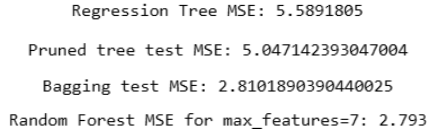